# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Group 4 : Final Presentation**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Prerequisites: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 1 - Exploratory Data Analysis (EDA)
We are using mainly three datasets from kaggle for our analysis. The datasets are:
    
    - [The Utrecht Fairness Recruitment dataset](https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset)
    - [Employee performance dataset](https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data)
    - [The Salary Data dataset](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)


## Dataset and Parameter Descriptions

### Employee Performance Dataset
- **Employee_ID**: Unique identifier for each employee.
- **Department**: The department where the employee works (e.g., IT, HR, etc.).
- **Gender**: Employee's gender (Male/Female).
- **Age**: Age of the employee in years.
- **Job_Title**: Employee's job role or title.
- **Hire_Date**: Date and time the employee was hired.
- **Years_At_Company**: Total years the employee has worked at the company.
- **Education_Level**: Employee's highest educational qualification (e.g., High School, Bachelor's).
- **Performance_Score**: Rating of the employee's performance (scale of 1 to 5).
- **Monthly_Salary**: Monthly salary of the employee in the company's currency.
- **Work_Hours_Per_Week**: Weekly work hours for the employee.
- **Projects_Handled**: Number of projects managed by the employee.
- **Overtime_Hours**: Total overtime hours worked.
- **Sick_Days**: Number of sick days taken by the employee.
- **Remote_Work_Frequency**: Frequency of remote work.
- **Team_Size**: Size of the team the employee works with.
- **Training_Hours**: Total hours spent in training sessions.
- **Promotions**: Number of promotions received during employment.
- **Employee_Satisfaction_Score**: A metric reflecting employee satisfaction on a scale.
- **Resigned**: Indicates whether the employee has resigned (True/False).

### Salary Data Dataset
- **Age**: Age of the individual in years.
- **Gender**: Gender of the individual (Male/Female).
- **Education Level**: Highest educational qualification (e.g., Bachelor's).
- **Job Title**: Current job role of the individual (e.g., Software Engineer).
- **Years of Experience**: Total years of professional experience.
- **Salary**: Annual salary of the individual in currency.

### Recruitment Dataset
- **Id**: Unique identifier for the candidate.
- **Gender**: Gender of the candidate (Male/Female/Other).
- **Age**: Age of the candidate in years.
- **Nationality**: Nationality of the candidate.
- **Sport**: Sport the candidate participates in.
- **ind-university_grade**: Candidate's grade in university (numeric score).
- **ind-debateclub**: Indicator of participation in a debate club (True/False).
- **ind-programming_exp**: Indicator of programming experience (True/False).
- **ind-international_exp**: Indicator of international experience (True/False).
- **ind-entrepeneur_exp**: Indicator of entrepreneurial experience (True/False).
- **ind-languages**: Number of languages known by the candidate.
- **ind-exact_study**: Indicator of an exact sciences degree (True/False).
- **ind-degree**: Level of academic degree obtained (e.g., Bachelor's, Master's, PhD).
- **company**: Company to which the candidate applied (e.g., A, B, etc.).
- **decision**: Recruitment decision for the candidate (True/False).


## Step 2 - Code Implementation

In [12]:
import pandas as pd

class SalaryDataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """Load the dataset from a CSV file."""
        try:
            self.data = pd.read_csv(self.file_path)
            print("Data loaded successfully.")
        except Exception as e:
            print(f"Error loading data: {e}")

    def clean_data(self):
        """Perform data cleaning."""
        if self.data is not None:
            # Drop duplicates
            self.data.drop_duplicates(inplace=True)

            # Handle missing values (example: fill with median or drop rows)
            self.data.fillna(self.data.median(numeric_only=True), inplace=True)

            # Standardize column names
            self.data.columns = [col.strip().replace(' ', '_').lower() for col in self.data.columns]

            print("Data cleaned successfully.")
        else:
            print("Data is not loaded. Please load the data first.")

    def preprocess_data(self):
        """Perform data preprocessing like encoding and scaling."""
        if self.data is not None:
            # Convert categorical data to numerical (example: one-hot encoding)
            self.data = pd.get_dummies(self.data, columns=['gender', 'education_level', 'job_title'], drop_first=True)

            print("Data preprocessed successfully.")
        else:
            print("Data is not loaded. Please load the data first.")

    def get_data(self):
        """Return the processed data."""
        return self.data
    


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

class DataNormalization:
    def __init__(self, data):
        self.data = data
        self.male_data = data[data['Gender'] == 'Male']
        self.female_data = data[data['Gender'] == 'Female']
        
    def plot_all_in_one_row(self, column, gender=None):
        """Plot all normalization plots in one row for a given column."""
        data_to_plot = self.male_data if gender == 'Male' else self.female_data if gender == 'Female' else self.data
        
        # Create a 1x5 grid for plotting
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Plot Histogram
        sns.histplot(data_to_plot[column], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {column} ({gender if gender else "All"})')
        
        # Plot Q-Q Plot
        stats.probplot(data_to_plot[column], dist="norm", plot=axes[1])
        axes[1].set_title(f'Q-Q Plot of {column} ({gender if gender else "All"})')
        
        # Plot Boxplot
        sns.boxplot(x=data_to_plot[column], ax=axes[2])
        axes[2].set_title(f'Boxplot of {column} ({gender if gender else "All"})')
        
        # Plot Density Plot
        sns.kdeplot(data_to_plot[column], shade=True, ax=axes[3])
        axes[3].set_title(f'Density Plot of {column} ({gender if gender else "All"})')
        
        
        plt.tight_layout()
        plt.show()

    def plot_age_vs_salary(self, gender=None):
        """Plot Age vs Salary."""
        data_to_plot = self.male_data if gender == 'Male' else self.female_data if gender == 'Female' else self.data
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data_to_plot, x='Age', y='Monthly_Salary')
        plt.title(f'Age vs Monthly Salary ({gender if gender else "All"})')
        plt.show()
        
    def plot_experience_vs_salary(self, gender=None):
        """Plot Years of Experience vs Salary."""
        data_to_plot = self.male_data if gender == 'Male' else self.female_data if gender == 'Female' else self.data
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data_to_plot, x='Years_At_Company', y='Monthly_Salary')
        plt.title(f'Years of Experience vs Monthly Salary ({gender if gender else "All"})')
        plt.show()


In [14]:
file_path = "./data/Salary_Data.csv"

# Create an instance of SalaryDataProcessor
processor = SalaryDataProcessor(file_path)

# Perform the data processing steps
processor.load_data()
processor.clean_data()
processor.preprocess_data()

# Retrieve and display the processed data
processed_data = processor.get_data()
print(processed_data.head())



Data loaded successfully.
Data cleaned successfully.
Data preprocessed successfully.
    age  years_of_experience    salary  gender_Male  gender_Other  \
0  32.0                  5.0   90000.0         True         False   
1  28.0                  3.0   65000.0        False         False   
2  45.0                 15.0  150000.0         True         False   
3  36.0                  7.0   60000.0        False         False   
4  52.0                 20.0  200000.0         True         False   

   education_level_Bachelor's Degree  education_level_High School  \
0                              False                        False   
1                              False                        False   
2                              False                        False   
3                              False                        False   
4                              False                        False   

   education_level_Master's  education_level_Master's Degree  \
0                    

## Step 3 - Use Case Summary: Workplace Bias Analysis

In this analysis, we examine three datasets—Employee Performance, Salary Data, and Recruitment Data—to identify potential workplace biases based on factors such as gender, age, education, job role, and other demographics. The goal is to uncover systemic biases that might influence employee performance evaluations, salary disparities, or recruitment decisions. By exploring these datasets collectively, we aim to provide insights into whether specific groups face disadvantages and propose actionable strategies to mitigate these biases.

Datasets and Their Significance

#### Employee Performance Dataset:
This dataset provides details about employees’ performance, demographics, and job-related metrics. Key variables like ‘Gender’, ‘Age’, ‘Department’, and ‘Education_Level’ can help us analyze if performance scores or promotions show bias against specific groups. The inclusion of metrics like ‘Monthly_Salary’, ‘Training_Hours’, and ‘Team_Size’ offers insights into resource allocation and growth opportunities.

#### Salary Data Dataset:
This dataset focuses on the relationship between factors like ‘Gender’, ‘Education Level’, and ‘Years of Experience’ with salaries. It enables an investigation into whether pay disparities exist based on gender or other demographic factors despite equivalent qualifications or experience.

#### Recruitment Dataset:
The Recruitment Dataset evaluates the fairness of hiring decisions. Parameters such as ‘Gender’, ‘Age’, ‘Nationality’, and indicators of extracurricular activities (‘ind-debateclub’, ‘ind-programming_exp’, etc.) allow us to explore how non-academic factors influence hiring decisions and whether such criteria create disadvantages for specific groups.


### Final Hypothesis

"Workplace biases exist in performance evaluations, salary decisions, and recruitment processes, disproportionately affecting specific groups based on gender, age, and education level."

## Step 4 - Comprehensive Data Analysis
- Normality Tests: Ensure the datasets meet assumptions for parametric tests, avoiding skewed or misleading results.

- T-Tests and F-Tests: Offer insights into gender and education-based disparities, aiding in isolating specific bias patterns.

- Chi-Square Test: Highlights dependency relationships in recruitment decisions, helping identify systemic bias.

- ANOVA: Identifies disparities across multiple groups, ensuring thorough performance and salary analyses.

- Predictive Modeling: Supports hypothesis testing and quantifies the influence of demographic factors, allowing actionable recommendations.

C:\Users\sreeh\AppData\Local\Temp\ipykernel_19000\3588701118.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_to_plot[column], shade=True, ax=axes[3])


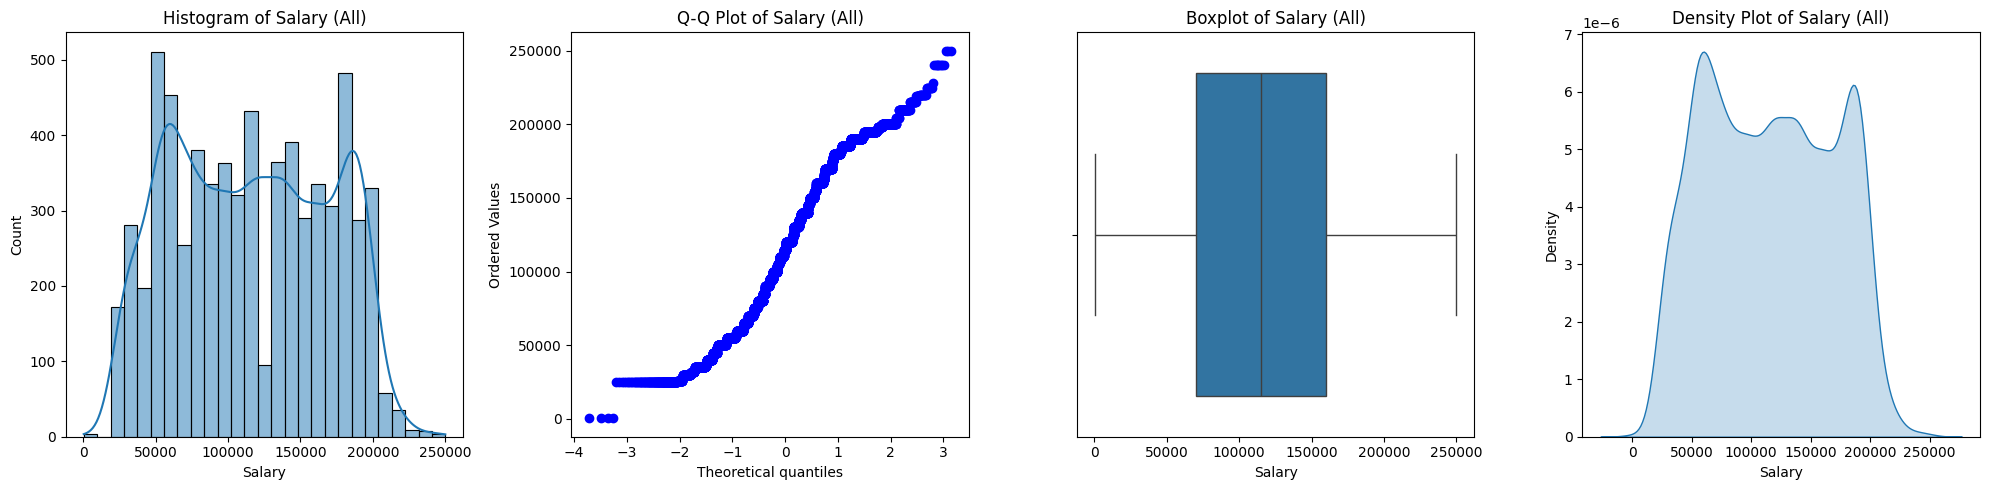

In [15]:
data = pd.read_csv(file_path)
normalizer = DataNormalization(data)
normalizer.plot_all_in_one_row('Salary')
